# Feedforward Neural Network - regression problem

# Keras bike sharing prediction

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the data
data_path = 'C:\\Users\\Duo\\Downloads\\ride_hour.csv'
rides = pd.read_csv(data_path)

rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# turn dummy fields into numerical values
dummy_fields = ['season', 'weathersit', 'mnth', 'yr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

# drop unnecessary columns
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'yr']
data = rides.drop(fields_to_drop, axis=1)

data.head()

,hr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,mnth_12,yr_0,yr_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0.22,0.80,0.0,8,32,40,1,0,...,0,1,0,0,0,0,0,0,0,1
2,2,0,0.22,0.80,0.0,5,27,32,1,0,...,0,1,0,0,0,0,0,0,0,1
3,3,0,0.24,0.75,0.0,3,10,13,1,0,...,0,1,0,0,0,0,0,0,0,1
4,4,0,0.24,0.75,0.0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,1


In [4]:
# standardize numerical values
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']

for each in quant_features:
    s = data[each].copy()
    mean, std =  s.mean(),  s.std()
    s = (s - mean)/std

data.head()

,hr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,mnth_12,yr_0,yr_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0.22,0.80,0.0,8,32,40,1,0,...,0,1,0,0,0,0,0,0,0,1
2,2,0,0.22,0.80,0.0,5,27,32,1,0,...,0,1,0,0,0,0,0,0,0,1
3,3,0,0.24,0.75,0.0,3,10,13,1,0,...,0,1,0,0,0,0,0,0,0,1
4,4,0,0.24,0.75,0.0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,1


In [5]:
data.describe()

,hr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,mnth_12,yr_0,yr_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,0.028770,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088,0.244088,0.253697,...,0.085333,0.497439,0.502561,0.143967,0.142643,0.141147,0.142413,0.142183,0.143104,0.144542
std,6.914405,0.167165,0.192556,0.192930,0.122340,49.305030,151.357286,181.387599,0.429557,0.435139,...,0.279384,0.500008,0.500008,0.351066,0.349719,0.348184,0.349484,0.349248,0.350189,0.351649
min,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,0.000000,0.500000,0.630000,0.194000,17.000000,115.000000,142.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.000000,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# train test split
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data['cnt']

X_train, y_train = features[:-60*24].values, targets[:-60*24].values.reshape(-1,1)
X_test, y_test = features[-60*24:].values, targets[-60*24:].values.reshape(-1,1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

dense_model = Sequential()

dense_model.add(Dense(32, activation='sigmoid'))
dense_model.add(Dropout(0.2))

dense_model.add(Dense(16, activation='relu'))
dense_model.add(Dropout(0.2))

dense_model.add(Dense(1, activation='linear'))

dense_model.compile(loss='mean_squared_error', optimizer='adam')

res = dense_model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=2)

Using TensorFlow backend.


Epoch 1/10
 - 0s - loss: 66878.6146
Epoch 2/10
 - 0s - loss: 57718.3294
Epoch 3/10
 - 0s - loss: 45840.0021
Epoch 4/10
 - 0s - loss: 37423.6549
Epoch 5/10
 - 0s - loss: 32076.5740
Epoch 6/10
 - 0s - loss: 28882.9478
Epoch 7/10
 - 0s - loss: 26494.3779
Epoch 8/10
 - 0s - loss: 24888.5525
Epoch 9/10
 - 0s - loss: 23280.2024
Epoch 10/10
 - 0s - loss: 22762.7959


In [9]:
#Returns the loss value & metrics values for the test data
dense_model.evaluate(X_test, y_test)

1440/1440 [==============================] - 0s 28us/step


20363.548350694444

In [10]:
predictions = dense_model.predict(X_test)

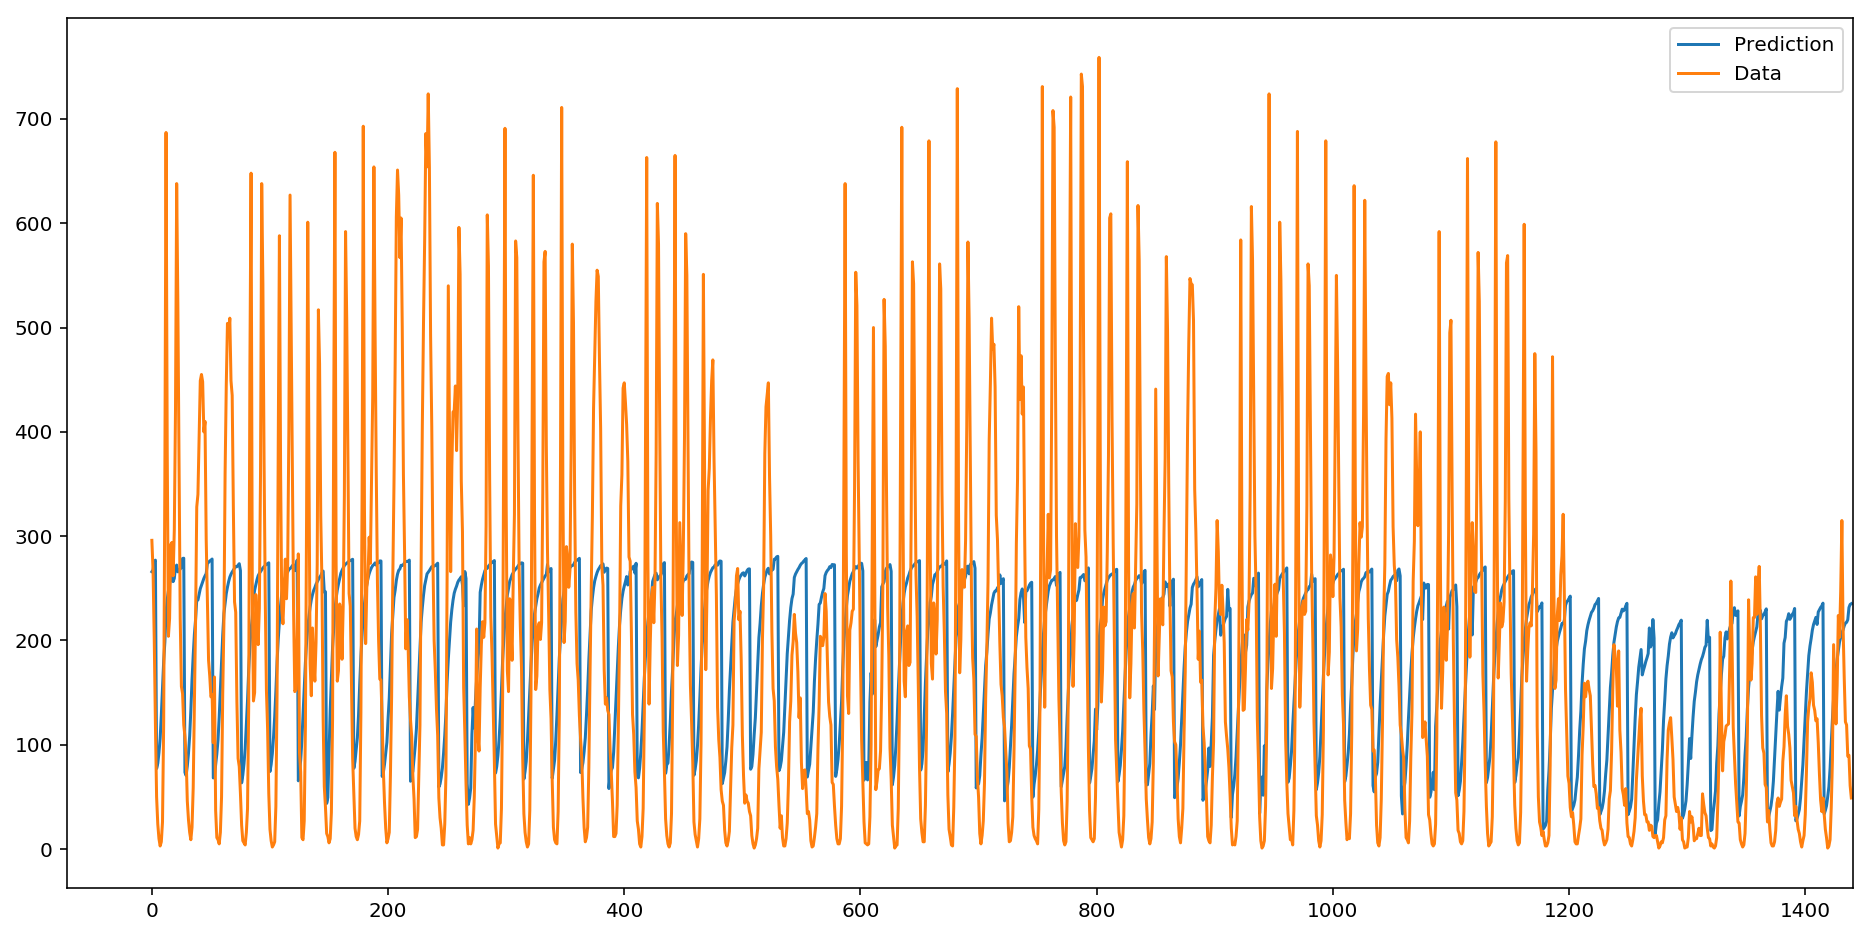

In [11]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(predictions, label='Prediction')
ax.plot(y_test, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

# Tensorflow: bike sharing prediction

In [12]:
def get_batch(inputs, targets, batch_size):
    for i in range(0, inputs.shape[0], batch_size):
        yield inputs[i:i+batch_size], targets[i:i+batch_size]

In [13]:
def dense_model_tf(X, hidden_dim1, hidden_dim2):
    W_1 = tf.Variable(tf.random_uniform([X_train.shape[1], hidden_dim1]))
    b_1 = tf.Variable(tf.zeros([hidden_dim1]))
    
    layer_1 = tf.add(tf.matmul(X, W_1), b_1)
    layer_1 = tf.nn.sigmoid(layer_1)

    W_2 = tf.Variable(tf.random_uniform([hidden_dim1, hidden_dim2]))
    b_2 = tf.Variable(tf.zeros([hidden_dim2]))
    
    layer_2 = tf.add(tf.matmul(layer_1, W_2), b_2)
    layer_2 = tf.nn.relu(layer_2)
    
    W_O = tf.Variable(tf.random_uniform([hidden_dim2, 1]))
    b_O = tf.Variable(tf.zeros([1]))
    
    output = tf.add(tf.matmul(layer_2,W_O), b_O)
    
    return output

In [14]:
import tensorflow as tf

# Build the computational graph for the neural network
x = tf.placeholder(tf.float32, shape=[None, X_train.shape[1]], name='input')
y = tf.placeholder(tf.float32, shape=[None, 1], name='output')

output = dense_model_tf(x, hidden_dim1=32, hidden_dim2=16)

# mean squared error cost function
cost = tf.reduce_mean(tf.square(output-y))

train = tf.train.AdamOptimizer(0.001).minimize(cost)

In [15]:
# Accuracy calculation
accuracy = tf.reduce_mean(tf.square(output-y))

In [16]:
# Initialize and train
init = tf.global_variables_initializer()

In [17]:
#Train the model
epoches=10

with tf.Session() as sess:
    sess.run(init)
    for step in range(epoches):
        for x_in_batch, y_in_batch in get_batch(X_train, y_train, batch_size=128):
            sess.run(train, feed_dict={x: x_in_batch, y: y_in_batch})
            
        print('step {0} of {1}'.format(step+1, epoches))
    
# Returns the accuracy value for the test data
    print(sess.run(accuracy, feed_dict={x: X_test, y: y_test}))

step 1 of 10
step 2 of 10
step 3 of 10
step 4 of 10
step 5 of 10
step 6 of 10
step 7 of 10
step 8 of 10
step 9 of 10
step 10 of 10
22760.766


# Pytorch: bike sharing prediction

In [18]:
#Build the computational graph for the neural network
import torch
import torch.nn as nn
import torch.nn.functional as F

class DensePytorch(nn.Module):
    def __init__(self, hidden_dim1, hidden_dim2):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(X_train.shape[1], hidden_dim1)
        self.hidden2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.out = nn.Linear(hidden_dim2, 1) 
        
    def forward(self, x):        
        # Pass the input tensor through each of our operations
        x = self.hidden1(x)
        # sigmoid activation
        x = torch.sigmoid(x)
        
        x = self.hidden2(x)
        # relu activation
        x = F.relu(x)
        
        x = self.out(x)
        
        return x
    
model = DensePytorch(hidden_dim1=32, hidden_dim2=16)
print(model)

DensePytorch(
  (hidden1): Linear(in_features=34, out_features=32, bias=True)
  (hidden2): Linear(in_features=32, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=1, bias=True)
)


In [19]:
# specify loss function
criterion = nn.MSELoss()

# specify optimizer, Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
# number of epochs to train the model
n_epochs = 10

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for x_in_batch, y_in_batch in get_batch(X_train, y_train, batch_size=128):
        x_in_batch = torch.from_numpy(x_in_batch).float()
        y_in_batch = torch.from_numpy(y_in_batch).float()
        
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(x_in_batch)
        # calculate the loss
        loss = criterion(output, y_in_batch)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()
             
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 8436200.998535
Epoch: 2 	Training Loss: 7638678.761475
Epoch: 3 	Training Loss: 6520956.223633
Epoch: 4 	Training Loss: 5450839.450317
Epoch: 5 	Training Loss: 4632446.884033
Epoch: 6 	Training Loss: 4021206.670410
Epoch: 7 	Training Loss: 3572694.128906
Epoch: 8 	Training Loss: 3283332.942383
Epoch: 9 	Training Loss: 3114363.370117
Epoch: 10 	Training Loss: 3020006.689453


In [21]:
#Returns the accuracy value for the test data
test_loss = 0
    
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()
    
output = model(X_test)
loss = criterion(output, y_test)
test_loss = loss.item()

print('Test Loss: {:.6f}'.format(test_loss))

Test Loss: 21875.277344


# CNN demo

# CNN using keras

In [22]:
# Load dataset
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

import numpy as np
# Make the numbers in the matrix as float number
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Make the numbers in the matrix range from 0-1
X_train /= 255
X_test /= 255

# One-hot encode the targets
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()

# convolution layer
model.add(Conv2D(16, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the 2D arrays for fully connected layers
model.add(Flatten()) 
model.add(Dense(10, activation=tf.nn.softmax))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total params: 3,330
Trainable params: 3,330
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X_train,y=y_train, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 28s 473us/step - loss: 0.3112 - acc: 0.9092


In [25]:
# Returns the loss value & metrics values for the test data
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 90us/step


[0.12767151055186987, 0.962]

# CNN using Tensorflow

In [26]:
def get_batch(inputs, targets, batch_size):
    for i in range(0, inputs.shape[0], batch_size):
        yield inputs[i:i+batch_size], targets[i:i+batch_size]

In [27]:
import tensorflow as tf

x = tf.placeholder(tf.float32, shape=[None, 28, 28, 1], name='input')
y = tf.placeholder(tf.float32, shape=[None, 10], name='output')

In [28]:
# Build the computational graph for the neural network
conv1 = tf.layers.conv2d(inputs=x, filters=16, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

conv2 = tf.layers.conv2d(inputs=pool1, filters=8, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

pool2_flat = tf.layers.Flatten()(pool2)

logits = tf.layers.dense(inputs=pool2_flat, units=10)

In [29]:
# Define the loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(logits), reduction_indices=[1]))

# Training step
train = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

In [30]:
# Accuracy calculation
correct_prediction = tf.equal(tf.argmax(logits, axis=1), tf.argmax(y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [31]:
# Initialize and train
init = tf.global_variables_initializer()

In [32]:
# Train the model
epoches=1

with tf.Session() as sess:
    sess.run(init)
    for step in range(epoches):
        for x_in_batch, y_in_batch in get_batch(X_train, y_train, batch_size=128):
            sess.run(train, feed_dict={x: x_in_batch, y: y_in_batch})
            
        print('step {0} of {1}'.format(step+1, epoches))
    
# Returns the accuracy value for the test data
    print(sess.run(accuracy, feed_dict={x: X_test, y: y_test}))

step 1 of 1
0.0974


# CNN using Pytorch

In [33]:
# Load MINST dataset in pytorch
import torch
from torchvision import datasets
import torchvision.transforms as transforms

# how many samples per batch to load
batch_size = 128

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [34]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolution layer
        self.conv1 = nn.Conv2d(1, 16, 3, padding=0)
        self.conv2 = nn.Conv2d(16, 8, 3, padding=0)

        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # linear layer 
        self.fc1 = nn.Linear(8 * 5 * 5, 10)
        
        # softmax layer
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        # flatten image input
        x = x.view(-1, 8 * 5 * 5)

        x = self.fc1(x)
        x = self.softmax(x)
        return x

# create a complete CNN
model = Net()
print(model)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax()
  (dropout): Dropout(p=0.25)
)


In [35]:
# specify loss function (cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer, Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [37]:
# number of epochs to train the model
n_epochs = 1

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
             
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 1.793061


In [38]:
#Returns the accuracy value for the test data
test_loss = 0
accuracy = 0

for data, target in test_loader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    
    ps = torch.exp(output)
    _, top_class = ps.topk(1, dim=1)
    equals = top_class == target.view(*top_class.shape)
    accuracy += torch.mean(equals.type(torch.FloatTensor))
    
test_loss = test_loss/len(test_loader.dataset)
accuracy = accuracy/len(test_loader)

print('Test Loss: {:.6f}, accuracy: {}'.format(test_loss, accuracy))

Test Loss: 1.695762, accuracy: 0.7685917615890503
